# Aprendizagem Automática - Regressão Parte 2
##  Gonçalo Marques 92630
##  Rita Leite 92646

### 16 outubro 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import sklearn as sk
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import balanced_accuracy_score as BACC
from sklearn.metrics import r2_score as R2
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.neighbors import LocalOutlierFactor
from scipy.spatial import distance
import statsmodels.api as sm
import seaborn as sns

random.seed(23)

In [2]:
# Rita
#X=np.load("E:ML\Xtrain_Regression_Part1 .npy")
#XTrue=np.load("E:ML\Xtest_Regression_Part1.npy")
#Y=np.load("E:ML\Ytrain_Regression_Part1.npy")

# Gonçalo
X = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Regressão - Parte 2\\Xtrain_Regression_Part2.npy")
Y = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Regressão - Parte 2\\Ytrain_Regression_Part2.npy")
XTrue = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Regressão - Parte 2\\Xtest_Regression_Part2.npy")

Xdf = pd.DataFrame(X)
Ydf = pd.DataFrame(Y)
XTruedf = pd.DataFrame(XTrue)

# Eval_Scores

In [3]:
def scores(y_real,y_pred,mode):
    ###y_real - ground truth vector 
    ###y_pred - vector of predictions, must have the same shape as y_real
    ###mode   - if evaluating regression ('r') or classification ('c')
    
    if y_real.shape != y_pred.shape:
        print('confirm that both of your inputs have the same shape')
    else:
        if mode == 'r':
            mse = MSE(y_real,y_pred)
            print('The Mean Square Error is', mse)
            return mse
        
        elif mode == 'c':
            bacc = BACC(y_real,y_pred)
            print('The Balanced Accuracy is', bacc)
            return bacc
        
        else:
            print('You must define the mode input.')



# Modelo

In [4]:
# Train/Test
#Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size = 0.2, random_state = 23)

# Modelo Linear
modelA = LinearRegression()
modelA.fit(X, Y)

Y_predictionA = modelA.predict(X)

MSEA = MSE(Y, Y_predictionA)
r2A = R2(Y,Y_predictionA)
print("MSE is {0}".format(MSEA))
print("R2  is {0}".format(r2A))

MSE is 1.324115944583192
R2  is 0.8555508819914447


# BoxPlots

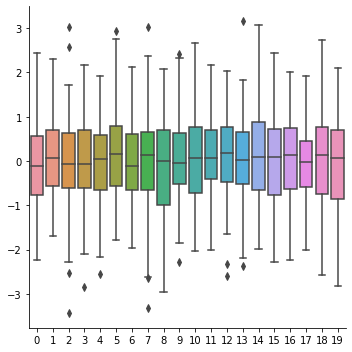

In [5]:
sns.catplot(data = Xdf, kind="box")

# Scatterplots

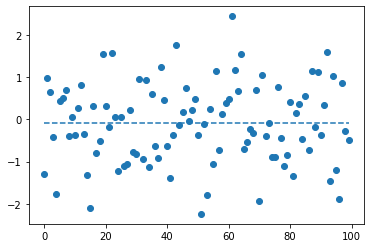

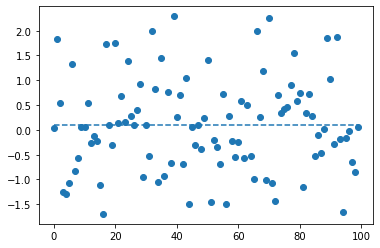

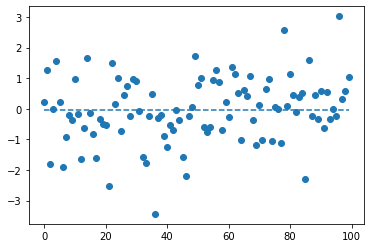

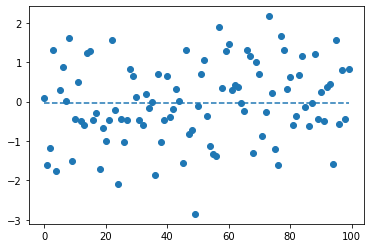

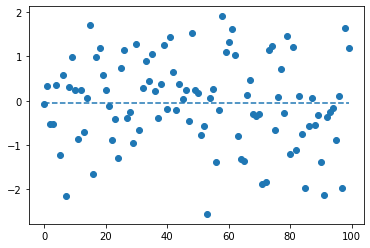

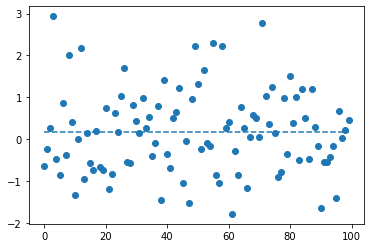

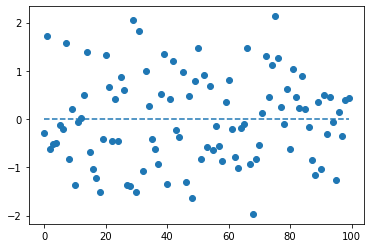

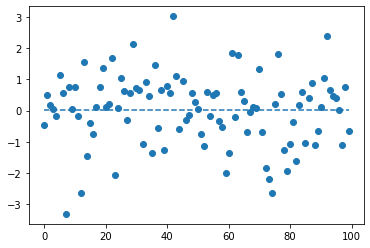

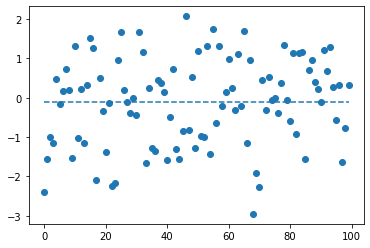

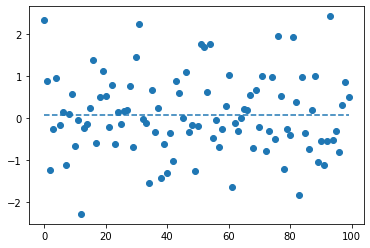

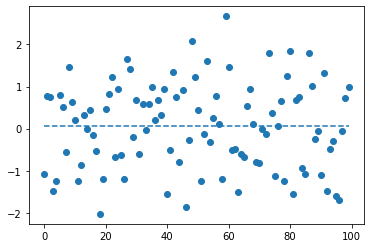

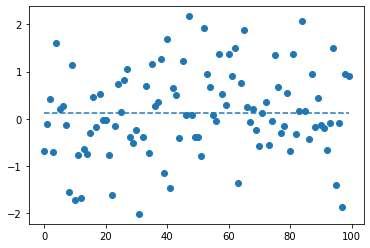

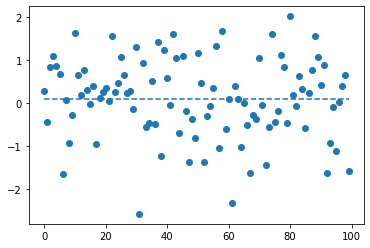

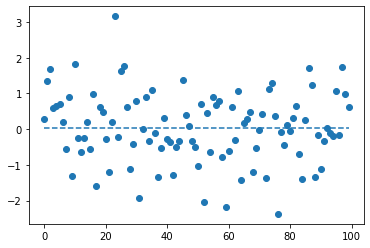

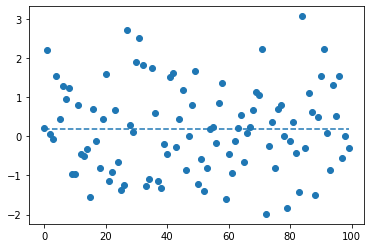

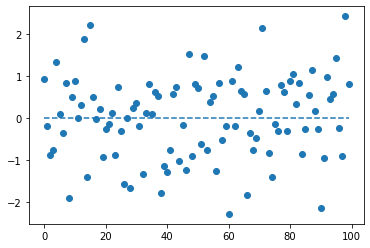

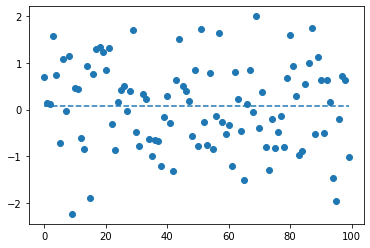

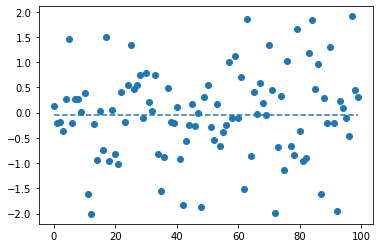

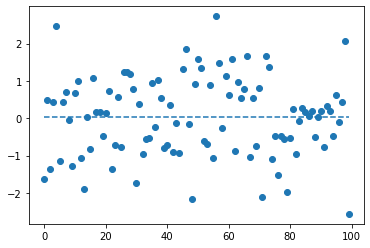

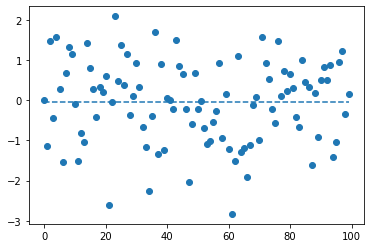

In [6]:
for i in range(20):
    fig,ax = plt.subplots()
    data = ax.scatter(range(100), Xdf[i], label='Data', marker='o')
    mean = ax.plot(range(100), np.repeat(np.mean(Xdf[i]), 100), label='Mean', linestyle='--')

### LocalOutlierFactor

In [7]:
LOF = LocalOutlierFactor(n_neighbors = 100)
LOF.fit_predict(X)
#np.min(LOF.negative_outlier_factor_)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Outliers em Y

In [8]:
# HatMatrix
def HatMatrix(X):
    HatMatrix = X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))
    return HatMatrix

In [9]:
# Deleted residuals
def deleted_residuals(X,Y,Pred):
    deviations = []
    H = HatMatrix(X)
    for i in range(len(Y)):
        var = (Y[i]-Pred[i]) / (1-H[i,i])
        deviations.append(var)
    return deviations

# Studentized Deleted Residuals
def studentized_deleted_residuals(X,Y,Pred):
    deviations = []
    H = HatMatrix(X)
    for i in range(len(Y)):
        model = LinearRegression()
        model.fit(np.delete(X,i,0), np.delete(Y,i,0))
        Y_prediction_temp = model.predict(np.delete(X,i,0))
        MSE_temp = MSE(np.delete(Y,i,0), Y_prediction_temp)
        var = (Y[i]-Pred[i]) / MSE_temp * (1-H[i,i])
        deviations.append(var)
    return deviations

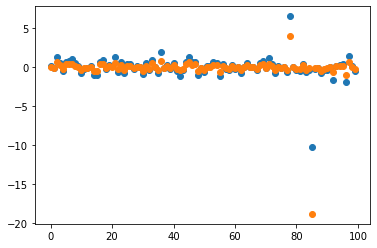

In [10]:
# Calcular Deleted residuals
devs_dr = np.array(deleted_residuals(X, Y, Y_predictionA))
plt.scatter(range(len(devs_dr)), devs_dr)

# Calcular Studentized Deleted Residuals
devs_sdr = np.array(studentized_deleted_residuals(X, Y, Y_predictionA))
plt.scatter(range(len(devs_sdr)), devs_sdr)

# Obter Indices de maiores Deleted residuals 
devs_dr_temp = np.absolute(devs_dr)
indices_dr = []
for j in range(9):
    i = np.where(np.isclose(devs_dr_temp, np.max(devs_dr_temp)))[0][0]
    indices_dr.append(i)
    devs_dr_temp[i] = 0
    
# Obter Indices de maiores Studentized Deleted residuals 
devs_sdr_temp = np.absolute(devs_sdr)
indices_sdr = []
for j in range(9):
    i = np.where(np.isclose(devs_sdr_temp, np.max(devs_sdr_temp)))[0][0]
    indices_sdr.append(i)
    devs_sdr_temp[i] = 0

### Outliers em X

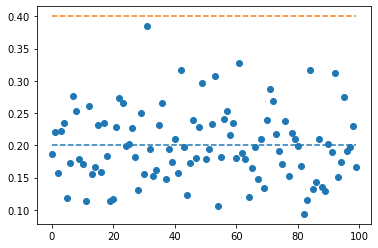

In [11]:
# Hat matrix - leaverages
H = HatMatrix(X)
Leaverages = np.diagonal(H)

# Gráfico das Leaverages
plt.scatter(range(100), Leaverages)
plt.plot(range(100), np.repeat(np.mean(Leaverages), 100), linestyle = '--')
plt.plot(range(100), np.repeat(0.4, 100), linestyle = '--')

# Obter Indices de maiores Leaverages
Leaverages_temp = np.absolute(Leaverages)
indices_lv = []
for j in range(9):
    i = np.where(np.isclose(Leaverages_temp, np.max(Leaverages_temp)))[0][0]
    indices_lv.append(i)
    Leaverages_temp[i] = 0

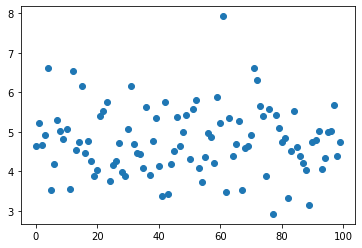

In [12]:
# Mahalanobis distance - classic
Cov = np.cov(np.transpose(X))
Miu = np.mean(X, axis = 0)

distances = []
for i in range(len(X)):
    dist = distance.mahalanobis(X[i], Miu, Cov)
    distances.append(dist)

distances = np.array(distances)
plt.scatter(range(100), distances)    

# Obter Indices de maiores distancias
distances_temp = np.absolute(distances)
indices_mh = []
for j in range(9):
    i = np.where(np.isclose(distances_temp, np.max(distances_temp)))[0][0]
    indices_mh.append(i)
    distances_temp[i] = 0

### Influential Cases

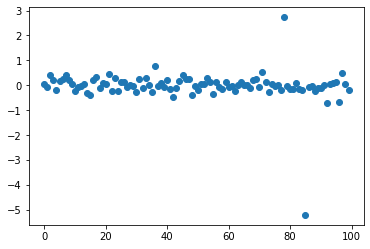

In [13]:
model = sm.OLS(Y,X).fit() 
influence = model.get_influence()

# Distância de Cook
cook_dist = influence.cooks_distance

indices_co = []
for i in range(len(cook_dist[0])):
    if  cook_dist[0][i] > np.mean(cook_dist[0]):
        indices_co.append(i)

# DFFITS
dffits_dist = influence.dffits
plt.scatter(range(len(dffits_dist[0])), dffits_dist[0])

indices_dff = []
for i in range(len(dffits_dist[0])):
    if  dffits_dist[0][i] > 2 * math.sqrt(0.2):
        indices_dff.append(i)
        
# DFBetas
dfbetas_dist = influence.dfbetas
#plt.scatter(range(len(dfbetas_dist[0])),dfbetas_dist[0])

indices_dfb = []
for j in range(0,19):
    for i in range(len(dfbetas_dist[0])):
        if  dfbetas_dist[0][j] > 0.2 or dfbetas_dist[0][j] < -0.2:
            indices_dfb.append(i)

In [14]:
print("deleted residuals     -> {0}".format(indices_dr))
print("st. deleted residuals -> {0}".format(indices_sdr))
print("leaverages            -> {0}".format(indices_lv))
print("mahal. distance       -> {0}".format(indices_mh))
print("Cook distance         -> {0}".format(np.sort(indices_co)))
print("DFFits                -> {0}".format(np.sort(indices_dff)))
print("DFBetas               -> {0}".format(np.sort(indices_dfb)))

deleted residuals     -> [85, 78, 36, 96, 92, 97, 21, 2, 45]
st. deleted residuals -> [85, 78, 96, 36, 97, 2, 45, 92, 21]
leaverages            -> [31, 61, 42, 84, 92, 53, 49, 71, 7]
mahal. distance       -> [61, 4, 71, 12, 72, 15, 31, 59, 52]
Cook distance         -> [21 36 42 71 78 85 92 96 97]
DFFits                -> [78]
DFBetas               -> []


# Eliminar Outliers

In [17]:
Outliers = [2, 31, 36, 61, 78, 85, 92, 96, 97]

# Rita
#X=np.load("E:ML\Xtrain_Regression_Part1 .npy")
#XTrue=np.load("E:ML\Xtest_Regression_Part1.npy")
#Y=np.load("E:ML\Ytrain_Regression_Part1.npy")

# Gonçalo
X = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Regressão - Parte 2\\Xtrain_Regression_Part2.npy")
Y = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Regressão - Parte 2\\Ytrain_Regression_Part2.npy")
XTrue = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Regressão - Parte 2\\Xtest_Regression_Part2.npy")

X2 = X[Outliers]
X2 = pd.DataFrame(X2)
Outliersdf = pd.DataFrame(Outliers)

X = np.delete(X, Outliers, 0)
Y = np.delete(Y, Outliers, 0)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size = 0.2, random_state = 23)

### Scatterplots

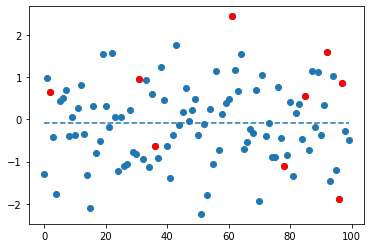

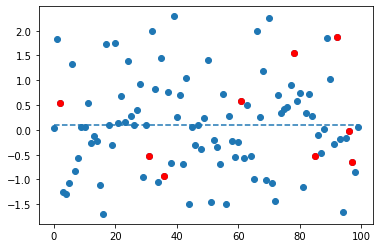

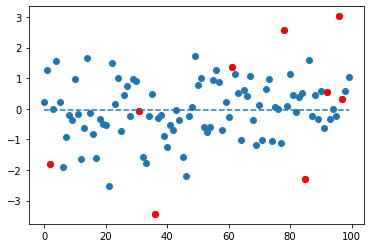

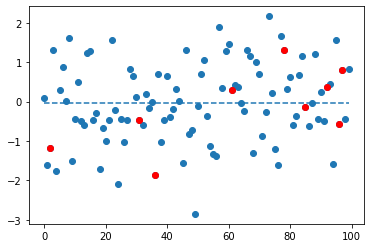

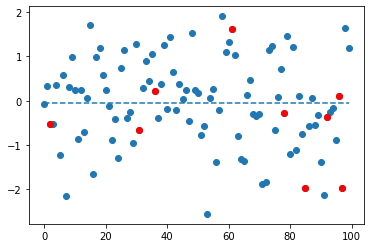

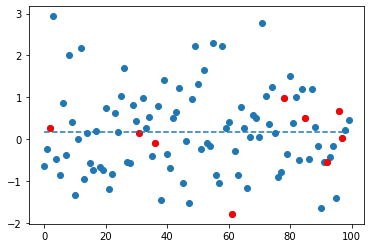

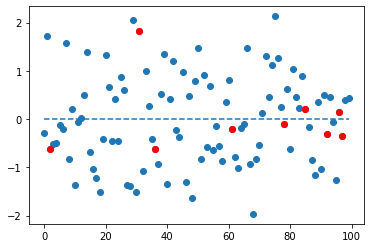

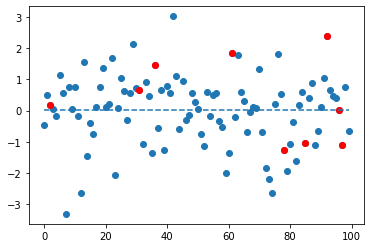

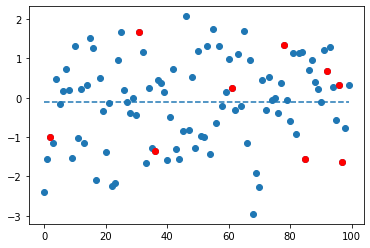

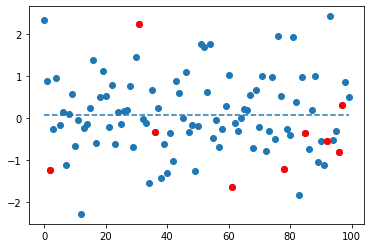

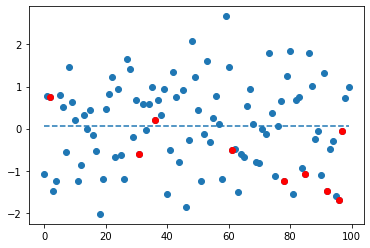

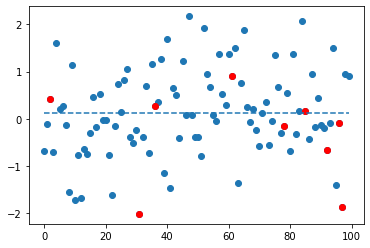

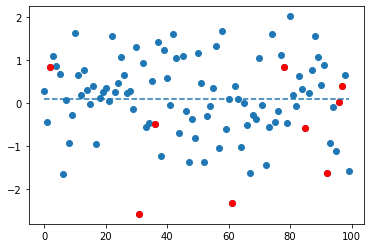

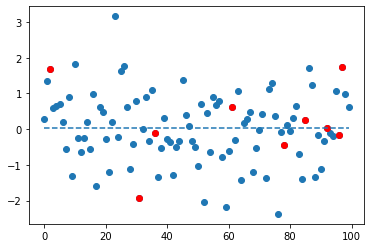

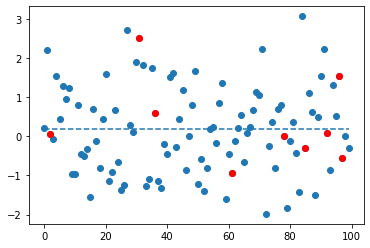

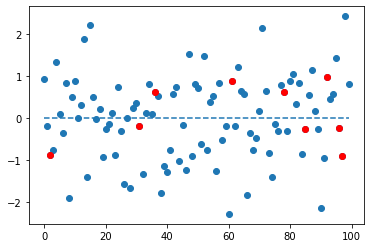

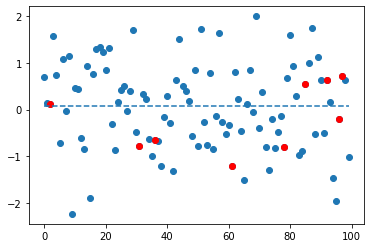

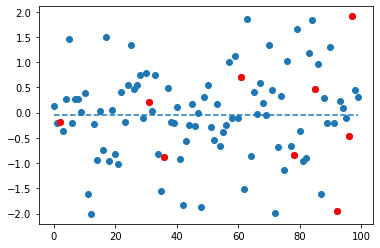

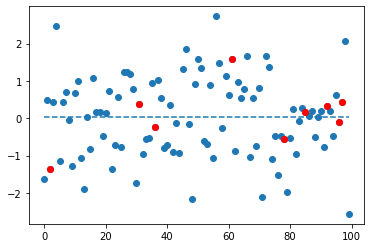

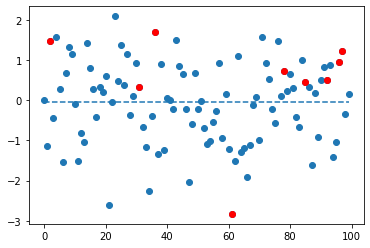

In [19]:
for i in range(20):
    fig,ax = plt.subplots()
    data = ax.scatter(range(100), Xdf[i], label='Data', marker='o')
    mean = ax.plot(range(100), np.repeat(np.mean(Xdf[i]), 100), label='Mean', linestyle='--')
    out = ax.scatter(Outliersdf, X2[i], label='Data', marker='o', color = 'red')

# Modelo Linear

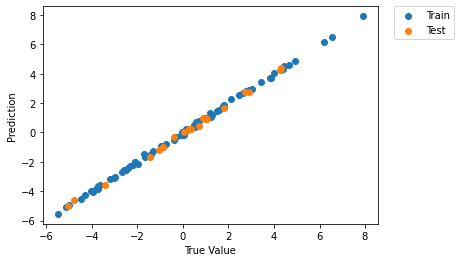

In [20]:
# Modelo Linear
modelA = LinearRegression()
modelA.fit(Xtrain, Ytrain)

Ytrain_predictionA = modelA.predict(Xtrain)
Ytest_predictionA = modelA.predict(Xtest)

plt.scatter(Ytrain,Ytrain_predictionA, label="Train")
plt.scatter(Ytest, Ytest_predictionA, label="Test")
plt.xlabel("True Value")
plt.ylabel("Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [21]:
MSEA = MSE(Ytest, Ytest_predictionA)
r2A = R2(Ytest,Ytest_predictionA)

print("MSE is {0}".format(MSEA))
print("R2  is {0}".format(r2A))
# print(scores(Ytest, Ytest_predictionA, 'r'))

MSE is 0.015833073756154586
R2  is 0.9975542464516506


# Modelo polinomial Grau 3


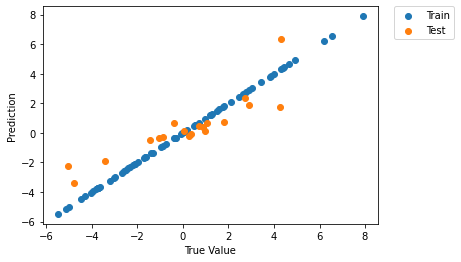

In [22]:
degree = 3
poly = PolynomialFeatures(degree)

Xtrain_transB = poly.fit_transform(Xtrain)
Xtest_transB = poly.fit_transform(Xtest)

modelB = LinearRegression()
modelB.fit(Xtrain_transB, Ytrain)

Ytrain_predictionB = modelB.predict(Xtrain_transB)
Ytest_predictionB = modelB.predict(Xtest_transB)

plt.scatter(Ytrain,Ytrain_predictionB, label="Train")
plt.scatter(Ytest, Ytest_predictionB, label="Test")
plt.xlabel("True Value")
plt.ylabel("Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [23]:
MSEB=MSE(Ytest, Ytest_predictionB)
r2B=R2(Ytest,Ytest_predictionB)

print("MSE is {0}".format(MSEB))
print("R2  is {0}".format(r2B))
# print(scores(Ytest, Ytest_predictionB, 'r'))

MSE is 1.5440130559817908
R2  is 0.7614944849923828


# Regressão de Lasso

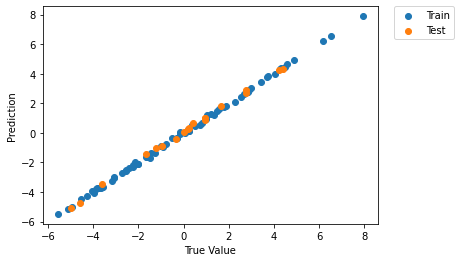

In [30]:
alphas = np.arange(0.00001, 0.001, 0.00001)
erros = []

# find the best alpha
for alpha in alphas:
    modelD = Lasso(alpha)
    modelD.fit(Xtrain, Ytrain)           
    Ytest_predictionD = modelD.predict(Xtest)
    erros.append(MSE(Ytest, Ytest_predictionD))
alpha = alphas[erros.index(min(erros))]

modelD = Lasso(alpha)
modelD.fit(Xtrain, Ytrain) 

Ytrain_predictionD = modelD.predict(Xtrain)
Ytest_predictionD = modelD.predict(Xtest)

plt.scatter(Ytrain_predictionD, Ytrain, label="Train")
plt.scatter(Ytest_predictionD, Ytest, label="Test")
plt.xlabel("True Value")
plt.ylabel("Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

The best alphas is 1e-05


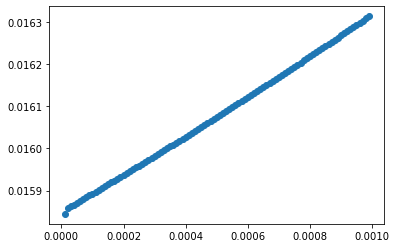

In [31]:
print("The best alphas is {0}".format(alpha))
plt.scatter(alphas, erros)

In [32]:
MSED = MSE(Ytest, Ytest_predictionD)
r2D = R2(Ytest,Ytest_predictionD)

print("MSE is {0}".format(MSED))
print("R2  is {0}".format(r2D))
# print(scores(Ytest, Ytest_predictionD, 'r'))

MSE is 0.0158444315364651
R2  is 0.997552492001951


# Regressão de Ridge

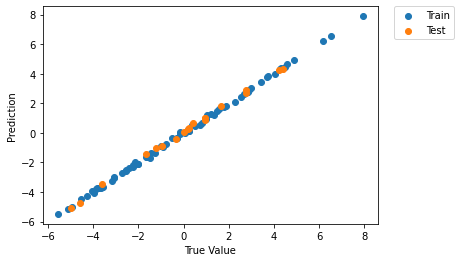

In [36]:
alphas = np.arange(0.00001, 0.1, 0.0001)
erros = []

# find the best alpha
for alpha in alphas:
    modelE = Ridge(alpha)
    modelE.fit(Xtrain, Ytrain)           
    Ytest_predictionE = modelE.predict(Xtest)
    erros.append(MSE(Ytest, Ytest_predictionE))
alpha = alphas[erros.index(min(erros))]

modelE = Ridge(alpha)
modelE.fit(Xtrain, Ytrain)  

Ytest_predictionE = modelE.predict(Xtest)
Ytrain_predictionE = modelE.predict(Xtrain)

plt.scatter(Ytrain_predictionE, Ytrain, label="Train")
plt.scatter(Ytest_predictionE, Ytest, label="Test")
plt.xlabel("True Value")
plt.ylabel("Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


The best alphas is 1e-05


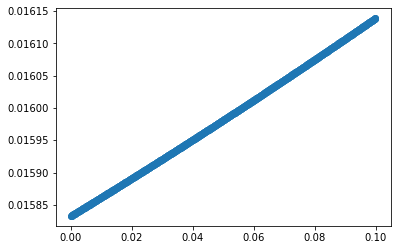

In [37]:
print("The best alphas is {0}".format(alpha))
plt.scatter(alphas, erros)

In [38]:
MSEE = MSE(Ytest, Ytest_predictionE)
r2E = R2(Ytest,Ytest_predictionE)

print("MSE is {0}".format(MSEE))
print("R2  is {0}".format(r2E))
# print(scores(Ytest, Ytest_pre# Melhor ModelodictionE, 'r'))

MSE is 0.01583310247130107
R2  is 0.9975542420159881


# Elastic Net

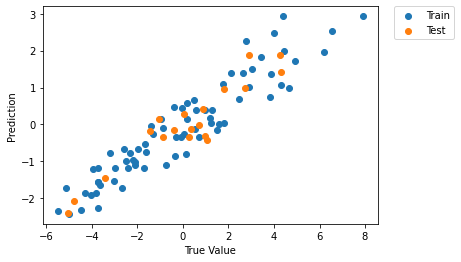

In [39]:
modelF = ElasticNet(random_state=23)
modelF.fit(Xtrain, Ytrain)

Ytrain_predictionF = modelF.predict(Xtrain)
Ytest_predictionF = modelF.predict(Xtest)

plt.scatter(Ytrain,Ytrain_predictionF, label="Train")
plt.scatter(Ytest, Ytest_predictionF, label="Test")
plt.xlabel("True Value")
plt.ylabel("Prediction")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [40]:
MSEF = MSE(Ytest, Ytest_predictionF)
r2F = R2(Ytest,Ytest_predictionF)

print("MSE is {0}".format(MSEF))
print("R2  is {0}".format(r2F))
# print(scores(Ytest, Ytest_predictionC, 'r'))

MSE is 2.4063570865059996
R2  is 0.6282871870896205


# Cross Validate

In [41]:
CVA = cross_validate(LinearRegression(), X, Y, scoring = "neg_mean_squared_error")
CVD = cross_validate(Lasso(alpha = 0.00001), X, Y, scoring = "neg_mean_squared_error")
CVE = cross_validate(Ridge(alpha = 0.00001), X, Y, scoring = "neg_mean_squared_error")

print("LinearRegression -> {0}".format(np.mean(CVA['test_score'])))
print("Lasso ->            {0}".format(np.mean(CVD['test_score'])))
print("Ridge ->            {0}".format(np.mean(CVE['test_score'])))
print(CVA)
print(CVD)
print(CVE)

LinearRegression -> -0.01496003151376352
Lasso ->            -0.01495907456682961
Ridge ->            -0.01496003982477509
{'fit_time': array([0.00099564, 0.0009973 , 0.00101185, 0.00099826, 0.00099802]), 'score_time': array([0.        , 0.        , 0.00098276, 0.        , 0.        ]), 'test_score': array([-0.00962583, -0.01714005, -0.01919213, -0.01420013, -0.01464202])}
{'fit_time': array([0.00099778, 0.00099754, 0.        , 0.        , 0.        ]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([-0.00962154, -0.01712454, -0.01920417, -0.01419849, -0.01464663])}
{'fit_time': array([0.        , 0.        , 0.00099611, 0.00099754, 0.00099707]), 'score_time': array([0.0009973 , 0.00099945, 0.00099659, 0.        , 0.00099754]), 'test_score': array([-0.00962582, -0.01714001, -0.01919222, -0.01420017, -0.01464198])}


In [107]:
alphas = np.arange(0.001, 0.1, 0.001)
erros = []
for alpha in alphas:
    CVD = cross_validate(Lasso(alpha), X, Y, scoring = "neg_mean_squared_error")      
    erros.append(CVD['test_score'])
np.mean(erros, axis = 1)

array([-2.20951899, -2.20462682, -2.19983719, -2.19524591, -2.19158179,
       -2.1880537 , -2.18463563, -2.18132547, -2.17812683, -2.17503811,
       -2.17205871, -2.16918647, -2.16656948, -2.1635572 , -2.16026288,
       -2.15705005, -2.15392826, -2.15087329, -2.14789758, -2.14501569,
       -2.14217073, -2.13937866, -2.13665055, -2.1339987 , -2.13144746,
       -2.1292161 , -2.12706226, -2.12497737, -2.12295956, -2.12101279,
       -2.11914073, -2.11732321, -2.11560141, -2.11387901, -2.11220861,
       -2.11120303, -2.11036466, -2.10956739, -2.10880939, -2.10816284,
       -2.10765655, -2.10727339, -2.10695226, -2.10674103, -2.10670934,
       -2.10674101, -2.1068367 , -2.10699579, -2.10723283, -2.10751855,
       -2.10786801, -2.10828092, -2.10871607, -2.10895129, -2.10925174,
       -2.10979395, -2.11038558, -2.11104072, -2.11175963, -2.11253738,
       -2.11337774, -2.11433692, -2.11545196, -2.11662165, -2.11776913,
       -2.11890799, -2.12010269, -2.12135307, -2.12265851, -2.12

In [108]:
alphas = np.arange(0.001, 0.1, 0.001)
erros = []
for alpha in alphas:
    CVE = cross_validate(Ridge(alpha), X, Y, scoring = "neg_mean_squared_error")      
    erros.append(CVE['test_score'])
np.mean(erros, axis=1)

array([-2.21453954, -2.21452279, -2.21450605, -2.21448931, -2.21447259,
       -2.21445587, -2.21443915, -2.21442245, -2.21440575, -2.21438906,
       -2.21437237, -2.2143557 , -2.21433903, -2.21432236, -2.21430571,
       -2.21428906, -2.21427242, -2.21425578, -2.21423916, -2.21422254,
       -2.21420592, -2.21418932, -2.21417272, -2.21415612, -2.21413954,
       -2.21412296, -2.21410639, -2.21408983, -2.21407327, -2.21405672,
       -2.21404018, -2.21402364, -2.21400711, -2.21399059, -2.21397408,
       -2.21395757, -2.21394107, -2.21392458, -2.21390809, -2.21389161,
       -2.21387514, -2.21385867, -2.21384221, -2.21382576, -2.21380932,
       -2.21379288, -2.21377645, -2.21376003, -2.21374361, -2.21372721,
       -2.2137108 , -2.21369441, -2.21367802, -2.21366164, -2.21364527,
       -2.2136289 , -2.21361254, -2.21359619, -2.21357984, -2.2135635 ,
       -2.21354717, -2.21353085, -2.21351453, -2.21349822, -2.21348192,
       -2.21346562, -2.21344933, -2.21343305, -2.21341678, -2.21

# Melhor Modelo

Text(0, 0.5, 'Prediction')

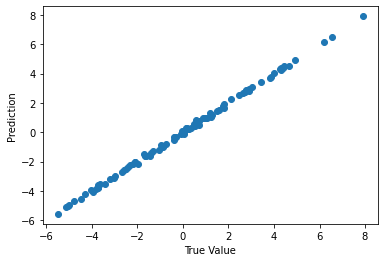

In [42]:
final_model = Lasso(alpha = 0.00001)
final_model.fit(X, Y) 

Y_prediction = final_model.predict(X)
YTrue_prediction = final_model.predict(XTrue)

plt.scatter(Y, Y_prediction)
plt.xlabel("True Value")
plt.ylabel("Prediction")

In [43]:
np.save("Ytest_prediction",YTrue_prediction)

final_MSE = MSE(Y, Y_prediction)
final_r2 = R2(Y, Y_prediction)

print("MSE is {0}".format(final_MSE))
print("R2  is {0}".format(final_r2))
# print(scores(Ytest, Ytest_predictionE, 'r'))

MSE is 0.00821641586030485
R2  is 0.9990832809450096


In [44]:
YTrue = np.load("C:\\Users\\gfmm2\\Desktop\\P1\\AAut\\Projeto\\Regressão - Parte 1\\Ytest_prediction.npy")
YTrue.shape

(1000, 1)